<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewers comment v1</h1>

Hello Andy!

I'm happy to review your project today 🙌

My name is **Justino Imbert** ([this](https://hub.tripleten.com/u/125e88ae) is my Hub profile) and today I'll be reviewing your project!


You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work cant be accepted with the red comments
</div>

Please dont remove my comments :) If you have any questions dont hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>   


<div class="alert alert-block alert-info">
<b>Reviewer's comment v1:</b> </a>

You are doing a great job in this project! I left you some comments for you to address before I can approve it!

Looking forward to reviewing your next submission! Best of luck!
    
</div>


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v3:</b>

    
<b>Overall Feedback</b>
    
Hello Antonio,
    
You’ve submitted another project—great work! Your commitment to pushing through the challenges of this program is admirable.

After reviewing your submission, it is approved.
    
   
You can find my more detailed notes within your project notebook in the `Reviewer's comment v3:` section.

If you find yourself uncertain or in need of further insights, never hesitate to consult with your tutor or ask your questions here. We are here to guide and assist you.

Machine Learning in Business: Project
-

Project Description
-
You work for the OilyGiant mining company. Your task is to find the best place for a new well.

Steps to choose the location:
- Collect the oil well parameters in the selected region: oil quality and volume of reserves;
- Build a model for predicting the volume of reserves in the new wells;
- Pick the oil wells with the highest estimated values;
- Pick the region with the highest total profit for the selected oil wells.

You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.

Data Description
-
Geological exploration data for the three regions are stored in files:
- geo_data_0.csv. download dataset
- geo_data_1.csv. download dataset
- geo_data_2.csv. download dataset
- id — unique oil well identifier
- f0, f1, f2 — three features of points (their specific meaning is unimportant, but the features themselves are significant)
product — volume of reserves in the oil well (thousand barrels).

Conditions:
- Only linear regression is suitable for model training (the rest are not sufficiently predictable).
- When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
- The budget for development of 200 oil wells is 100 USD million.
- One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).
- After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.

The data is synthetic: contract details and well characteristics are not disclosed.

In [160]:
#Loading and Importing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from joblib import dump
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy import stats as st

In [161]:
df0 = pd.read_csv('/datasets/geo_data_0.csv')
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df2 = pd.read_csv('/datasets/geo_data_2.csv')

Download and prepare the data. Explain the procedure.
-

In [162]:
def data_inspection(df):
    print(df.head())
    print(df.isna().sum())
    print(df.info())
    print(df.describe())

In [163]:
data_inspection(df0)

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.5

In [164]:
data_inspection(df1)

      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.7965

In [165]:
data_inspection(df2)

      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.4

First, we load and inspect all 3 datasets for its data types, null values, etc.  Looks like data is good in regards to nulls and datatype.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Awesome job creating a function to inspect the dataset!
    
</div>


Train and test the model for each region
-

In [166]:
#Split the data with ratio 75:25
def data_split(df):
    features = df.drop(columns=['product', 'id'])
    target =  df["product"]
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)
    print('Features train length:', len(features_train))
    print('Target train length:', len(target_train))
    print('Features test length:', len(features_test))
    print('Target test length:', len(target_test))
    return features_train, features_test, target_train, target_test

In [167]:
features_train0, features_test0, target_train0, target_test0 = data_split(df0)

Features train length: 75000
Target train length: 75000
Features test length: 25000
Target test length: 25000


In [168]:
features_train1, features_test1, target_train1, target_test1 = data_split(df1)

Features train length: 75000
Target train length: 75000
Features test length: 25000
Target test length: 25000


In [169]:
features_train2, features_test2, target_train2, target_test2 = data_split(df2)

Features train length: 75000
Target train length: 75000
Features test length: 25000
Target test length: 25000


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Great job splitting your data!
    
</div>


In [170]:
#Train model and make predictions, save predictions, print average volume of predicted reserves and RMSE.
def linear_reg(features_train, features_test, target_train, target_test):
    to_normalize = ['f0','f1','f2']
    scaler = StandardScaler()
    scaler.fit(features_train[to_normalize])
    features_train.loc[:,to_normalize] = scaler.transform(features_train[to_normalize])
    features_test.loc[:,to_normalize] = scaler.transform(features_test[to_normalize])
    lin_reg_model = LinearRegression().fit(features_train,target_train)
    predicted_values = lin_reg_model.predict(features_test)
    print('R2', lin_reg_model.score(features_test, target_test))
    print('RMSE:', np.sqrt(mean_squared_error(target_test, predicted_values)))
    print('Average Volume of Predicted Reserve:',predicted_values.mean() )
    return predicted_values

In [171]:
predicted_values0 = linear_reg(features_train0, features_test0, target_train0, target_test0)

R2 0.27994321524487786
RMSE: 37.5794217150813
Average Volume of Predicted Reserve: 92.59256778438035


In [172]:
predicted_values1 = linear_reg(features_train1, features_test1, target_train1, target_test1)

R2 0.9996233978805127
RMSE: 0.893099286775617
Average Volume of Predicted Reserve: 68.728546895446


In [173]:
predicted_values2 = linear_reg(features_train2, features_test2, target_train2, target_test2)

R2 0.20524758386040443
RMSE: 40.02970873393434
Average Volume of Predicted Reserve: 94.96504596800489


The R2 values of the 1st and 3rd datasets sits at 0.28 and 0.21 respectively.  This means that these 2 models can still be improved as the value is quite low.  Despite the low R2 values, the average volume of predicted reserves for both of those regions is higher than the 2nd dataset region.  This means that regions 1 and 3 are more preferred and has greater potential. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b> </a>

Nice job training and testing the model for each region! Results are looking good!

</div>


Prepare for profit calculation
-

In [174]:
#looking at the conditions of the project above, we will give each a variable.
n_points_total = 500
n_points_best = 200
n_points_wells = 200
budget_total = 100000000
rev_per_product = 4500
risk = 0.025

#Calculates the profit generated based on the volume of oil in a particular region.
#def profit(target, probabilities):
    #target = pd.Series(target).reset_index(drop=True)
    #probabilities = pd.Series(probabilities)
    #probs_sorted = probabilities.sort_values(ascending=False)
    #selected = target[probs_sorted.index][:n_points_best]
    #return (selected.sum()* (rev_per_product) - budget_total)

def profit(target, probabilities):
    target = pd.Series(target).reset_index(drop=True)
    probabilities = pd.Series(probabilities).reset_index(drop=True)

    #Sample 500 wells from the validation set (bootstrap)
    idx_500 = target.sample(n=n_points_total, replace=True).index
    target_500 = target.iloc[idx_500]
    probs_500 = probabilities.iloc[idx_500]
    sorted_idx = probs_500.sort_values(ascending=False).index

    #Keep only the top 200 wells
    top200_idx = sorted_idx[:n_points_best]
    selected = target_500.loc[top200_idx]

    #Compute profit for those 200 wells
    profit_value = selected.sum() * rev_per_product - budget_total

    return profit_value


In [175]:
#Calculate the volume of reserves sufficient for developing a new well without losses
print('The volume of reserves sufficient for developing a new well without losses is:', budget_total/n_points_best/(rev_per_product))

The volume of reserves sufficient for developing a new well without losses is: 111.11111111111111


Comparing this number of 111 to the predicted reserves above of 92.6, 28.7, and 95, the investment is decently safe but the calculation above is only for the absolute worst case scenario.

Edit:
You are right.  The investment would not be considered safe since they are all below the break-even point of 111.  We need to use bootstrap analysis to quantify how risky each region is regarding investment.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b> </a>

Since the break-even point is 111 and all three regions are below that, the investment wouldn’t really be considered “safe”!

</div>

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2</b>
 
Well done!

In [176]:
print('Profit of region 1:', profit(target_test0, predicted_values0))

Profit of region 1: 5978456.8904905915


In [177]:
print('Profit of region 2:', profit(target_test1, predicted_values1))

Profit of region 2: 4656195.261033937


In [178]:
print('Profit of region 3:', profit(target_test2, predicted_values2))

Profit of region 3: 2948598.3882703483


We can see that region 1 yields the most profit, followed by 3 and then 2 in that order.  
Edit:
Running this function multiple times, we can see a trend that region 1 generates the most profit over the other 2 regions, followed by region 2 and 3 in that order.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b> </a>

First, you need to take a sample of 500, and then select the best 200 from that subset to calculate the profit!
    
</div>

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2</b>
 
Well done!

Write a function to calculate profit from a set of selected oil wells and model predictions
-

In [179]:
#Pick the wells with the highest values of predictions.

#def highest_wells(target, probabilities, number):
    #target = pd.Series(target).reset_index(drop=True)
    #probabilities = pd.Series(probabilities)
    #probs_sorted = probabilities.sort_values(ascending=False)
    #selected = target[probs_sorted.index][:n_points_best]
    #return selected.head(number)

def highest_wells(target, probabilities, number):
    target = pd.Series(target).reset_index(drop=True)
    probabilities = pd.Series(probabilities).reset_index(drop=True)

    #Sample 500 wells
    idx_500 = target.sample(n=n_points_total, replace=True).index
    target_500 = target.iloc[idx_500]
    probs_500 = probabilities.iloc[idx_500]
    sorted_idx = probs_500.sort_values(ascending=False).index

    #Select the top K wells (actual targets)
    top_targets = target_500.loc[sorted_idx[:number]]

    return top_targets

In [180]:
highest_wells(target_test0, predicted_values0, 5)

17297    165.030923
16366    130.032771
5852     164.900029
2582     108.144791
19893    118.676706
Name: product, dtype: float64

In [181]:
highest_wells(target_test1, predicted_values1, 5)

4921     137.945408
15188    137.945408
23946    137.945408
11705    137.945408
7412     137.945408
Name: product, dtype: float64

In [182]:
highest_wells(target_test2, predicted_values2, 5)

12926    105.620676
1637     120.791430
18223    104.573385
7287     106.721759
10623    157.158083
Name: product, dtype: float64

We can see that the 2nd region has a lot of similar highest values. This would lead to a higher R2 value which we did see.  Based on our linear regression models, Region 3 shows the highest average predicted reserves (95.0k barrels), followed by Region 1 (92.6k barrels) and Region 2 (68.7k barrels). However, Region 2's predictions are most reliable with an R² of 0.999, while Regions 1 and 3 have lower model accuracy.

As for profit predictions, Region 1 has the highest profit prediction of 33M USD, which would not be a bad region to pick based on our initial investment of 100M USD.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b> </a>

You should calculate the profit from a set of selected oil wells here! It looks like you’re not taking the required sample of 500 wells before choosing the best 200!

</div>

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2</b>
 
Well done!

Calculate risks and profit for each region
-

In [190]:
def bootstrap_analysis(target, probabilities):
    profits = []
    
    target = pd.Series(target).reset_index(drop=True)
    probabilities = pd.Series(probabilities).reset_index(drop=True)

    for i in range(1000):

        # --- Step 1: sample 500 wells (target + prob together) ---
        idx_500 = target.sample(n=n_points_total, replace=True, random_state=i).index
        target_500 = target.iloc[idx_500]
        prob_500 = probabilities.iloc[idx_500]

        # --- Step 2: sort the 500 by predicted probability ---
        sorted_idx = prob_500.sort_values(ascending=False).index

        # --- Step 3: take the top 200 ---
        top200_idx = sorted_idx[:n_points_best]
        selected_targets = target_500.loc[top200_idx]

        # --- Step 4: calculate profit ---
        profit_value = selected_targets.sum() * rev_per_product - budget_total
        profits.append(profit_value)

    # convert to series
    profits = pd.Series(profits)

    # statistics
    loss_probability = (profits < 0).mean()
    average_profit = profits.mean()
    confidence_interval = (profits.quantile(0.025), profits.quantile(0.975))

    # output
    print("Wells with profit:", len(profits[profits > 0]))
    print("Average profit for region:", average_profit)
    print("95% confidence interval is:", confidence_interval)
    print("Loss risk probability:", loss_probability)

    plt.figure(figsize=(8, 5))
    plt.hist(profits, bins=30)
    plt.xlabel("Profit")
    plt.ylabel("Frequency")
    plt.title("Distribution of Profit from 1000 Bootstrap Samples")
    plt.grid(True)
    plt.show()
    
    return profits, loss_probability, average_profit, confidence_interval

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b> </a>

You should select the top 200 predicted wells before calculating profit!

</div>

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Reviewer's comment v2</b>
 
Done.

Wells with profit: 979
Average profit for region: 5997653.2399105765
95% confidence interval is: (465997.9252425354, 12239813.72648017)
Loss risk probability: 0.021


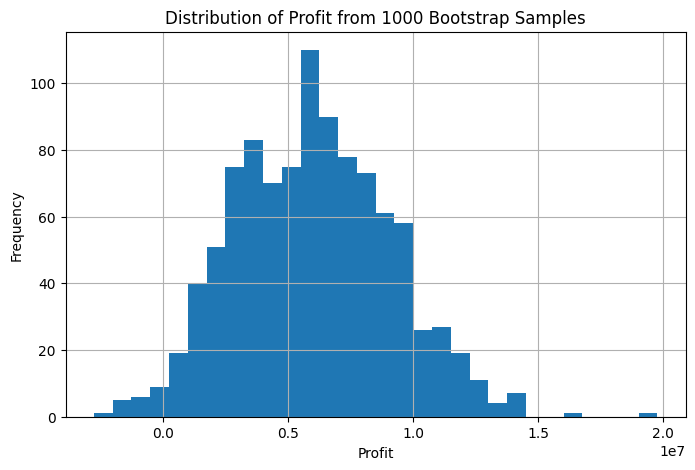

(0      4.898724e+06
 1      2.638157e+06
 2      8.414391e+06
 3      5.078051e+06
 4      1.034231e+07
            ...     
 995    5.470501e+05
 996    5.558987e+06
 997    7.441452e+06
 998    1.443977e+06
 999    6.891903e+06
 Length: 1000, dtype: float64,
 0.021,
 5997653.2399105765,
 (465997.9252425354, 12239813.72648017))

In [191]:
#Region 1 bootstrap
bootstrap_analysis(target_test0, predicted_values0)

Wells with profit: 993
Average profit for region: 6679445.739689242
95% confidence interval is: (1923383.3917684108, 12862856.796764573)
Loss risk probability: 0.007


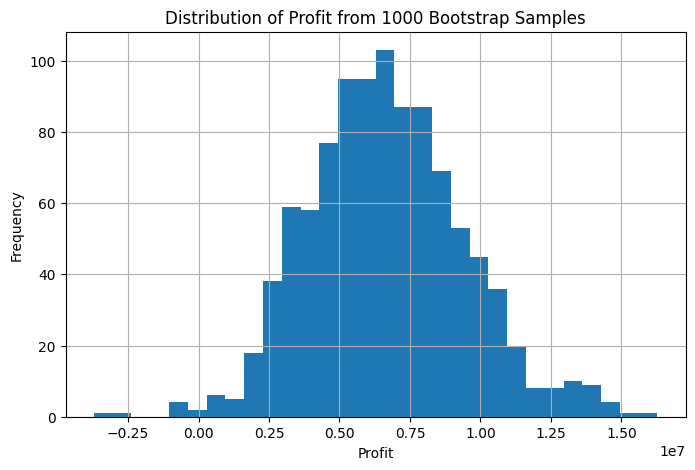

(0      4.898153e+06
 1      9.079225e+06
 2      8.159290e+06
 3      7.852023e+06
 4      1.286035e+07
            ...     
 995    4.070895e+06
 996    1.307432e+07
 997    6.703814e+06
 998    7.088831e+06
 999    2.964982e+06
 Length: 1000, dtype: float64,
 0.007,
 6679445.739689242,
 (1923383.3917684108, 12862856.796764573))

In [192]:
#Region 2 bootstrap
bootstrap_analysis(target_test1, predicted_values1)

Wells with profit: 977
Average profit for region: 5861344.128806776
95% confidence interval is: (380934.073102231, 11984001.647122765)
Loss risk probability: 0.023


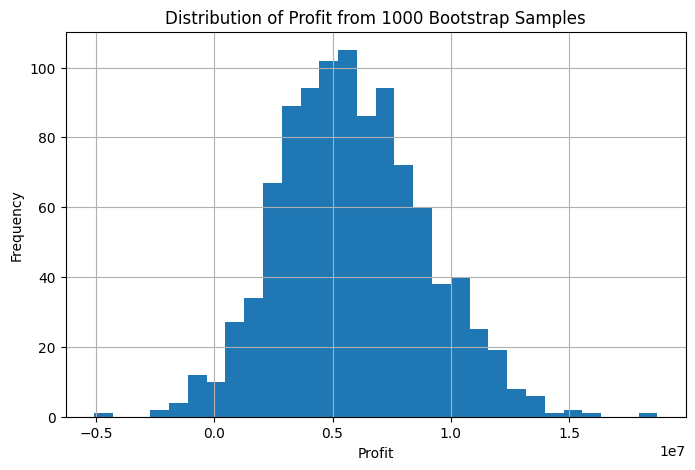

(0      8.386043e+06
 1      4.202385e+06
 2      6.652822e+06
 3      1.366593e+07
 4      3.009000e+06
            ...     
 995    9.770065e+06
 996    7.385099e+06
 997    5.607828e+06
 998    7.462390e+06
 999    3.757223e+06
 Length: 1000, dtype: float64,
 0.023,
 5861344.128806776,
 (380934.073102231, 11984001.647122765))

In [193]:
#Region 3 bootstrap
bootstrap_analysis(target_test2, predicted_values2)

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b> </a>

It would be awesome to see the distribution of profit in a plot! It’ll help illustrate the profit variability more clearly!

</div>

Bootstrap Analysis Results Summary
-
Region 1:
- Average profit: $5,997,653
- Loss risk: 2.1% 
- 95% confidence interval: (465,998 - 12,239,814)

Region 2:
- Average profit: $6,679,446
- Loss risk: 0.7%
- 95% confidence interval: (1,923,383 - 12,862,857)

Region 3:
- Average profit: $5,861,344
- Loss risk: 2.3%
- 95% confidence interval: (380,934 - 11,984,002)

Conclusions
-

Bootstrapping gave us a better insight as to which region the company should build in.  Region 2 is the clear choice because of its low risk factor being only 0.7 and also yields the highest average profit.  Regions 1 and 3 both are under 2.5% risk but still higher risk that Region 2.